In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rcParams.update({'font.size': 10}) # Set global font size to 18

SAMPLING_PERIOD = 50 * 10**(-3)
TRANSMISSION_RATIO = 8.89
WHEEL_RADIUS = 20.5 * 2.54 / 2 / 100
PI = 3.1415
MS_TO_KPH = 3.6

dataset_path = "./data/dados_telemetria/teste_odonto_25_10_2_longer/"

motion_state = pd.read_csv(f'{dataset_path}/76_MOTION_STATE.csv')
torque_ctrl = pd.read_csv(f'{dataset_path}/78_TORQUE_CTRL.csv')
wheel_spd = pd.read_csv(f'{dataset_path}/79_WHEEL_SPD.csv')
left_motor_info_1 = pd.read_csv(f'{dataset_path}/85_LEFT_MOTOR_INFO_1.csv')
left_motor_info_2 = pd.read_csv(f'{dataset_path}/86_LEFT_MOTOR_INFO_2.csv')
left_motor_info_3 = pd.read_csv(f'{dataset_path}/87_LEFT_MOTOR_INFO_3.csv')
left_motor_info_4 = pd.read_csv(f'{dataset_path}/88_LEFT_MOTOR_INFO_4.csv')

right_motor_info_1 = pd.read_csv(f'{dataset_path}/95_RIGHT_MOTOR_INFO_1.csv')
right_motor_info_2 = pd.read_csv(f'{dataset_path}/96_RIGHT_MOTOR_INFO_2.csv')
right_motor_info_3 = pd.read_csv(f'{dataset_path}/97_RIGHT_MOTOR_INFO_3.csv')
right_motor_info_4 = pd.read_csv(f'{dataset_path}/98_RIGHT_MOTOR_INFO_4.csv')
right_motor_info_4

In [12]:
# FUNCÕES AUXILIARES
def get_range_by_time(df, start_time, end_time):
    if end_time == -1:
        return range(len(df))
    start_index = df.index[df['t'] >= start_time].tolist()[0]
    end_index = df.index[df['t'] <= end_time].tolist()[-1]
    return range(start_index, end_index + 1)

In [8]:
# identifica o tempo inicial
TIME_INTERVAL = 117

start_time = math.inf

for df in [motion_state, torque_ctrl, wheel_spd,
           left_motor_info_1, left_motor_info_2, left_motor_info_3, left_motor_info_4,
           right_motor_info_1, right_motor_info_2, right_motor_info_3, right_motor_info_4]:
       df['t'] = df['index'] * TIME_INTERVAL

right_motor_info_4

,index,date,INV_STATE_R_MOTOR,FAILURE_R_MOTOR,ALARM_R_MOTOR,1,2,3,4,5,t
0,0,1762968053603,0,0,0,0.0,0,0,0,0,0
1,1,1762968053819,0,0,0,0.0,0,0,0,0,117
2,2,1762968053936,0,0,0,0.0,0,0,0,0,234
3,3,1762968054036,0,0,0,0.0,0,0,0,0,351
4,4,1762968054153,0,0,0,0.0,0,0,0,0,468
...,...,...,...,...,...,...,...,...,...,...,...
3581,3581,1762968621430,1,0,0,0.0,0,0,0,0,418977
3582,3582,1762968621547,1,0,0,0.0,0,0,0,0,419094
3583,3583,1762968621648,1,0,0,0.0,0,0,0,0,419211
3584,3584,1762968621780,1,0,0,0.0,0,0,0,0,419328


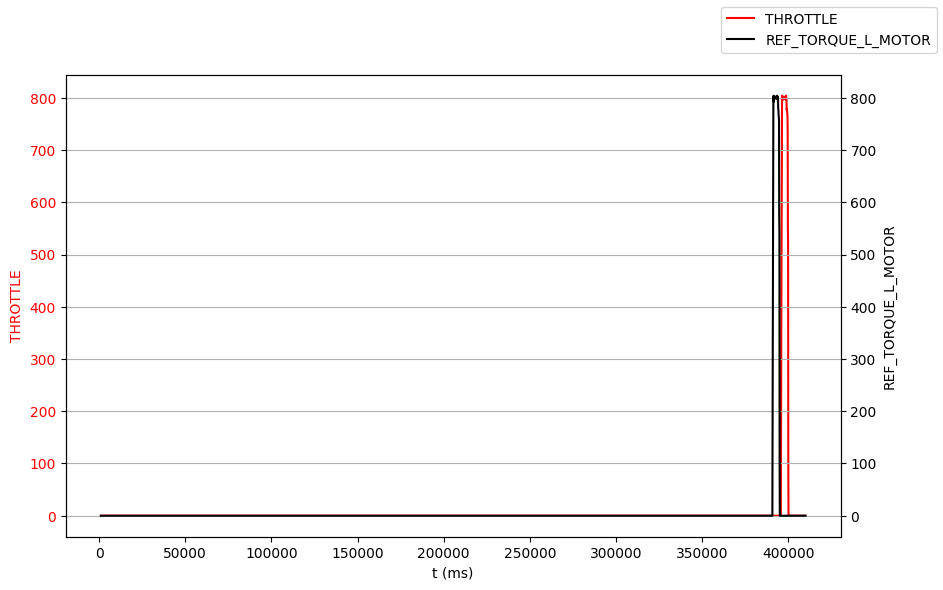

In [ ]:
# Create the first axis
START_TIME = 1000
END_TIME = 410000

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(motion_state['t'][get_range_by_time(motion_state, START_TIME, END_TIME)], motion_state['THROTTLE'][get_range_by_time(motion_state, START_TIME, END_TIME)], label='THROTTLE', color='red')
ax1.set_xlabel('t (ms)')
ax1.set_ylabel('THROTTLE', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(torque_ctrl['t'][get_range_by_time(torque_ctrl, START_TIME, END_TIME)], torque_ctrl['REF_TORQUE_L_MOTOR'][get_range_by_time(torque_ctrl, START_TIME, END_TIME)], label='REF_TORQUE_L_MOTOR', color='black')
ax2.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

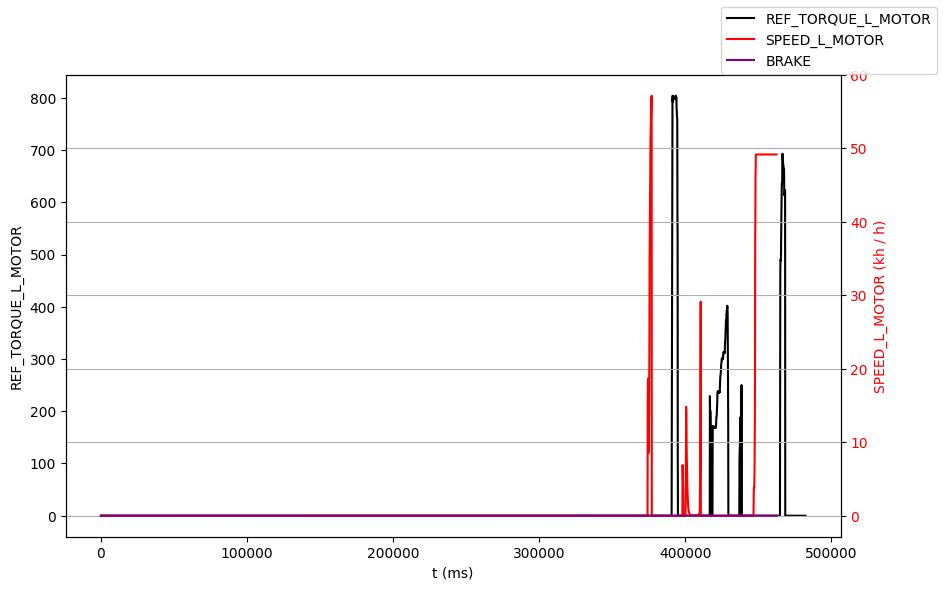

In [13]:
START_TIME = 1000
END_TIME = -1

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(torque_ctrl['t'][get_range_by_time(torque_ctrl, START_TIME, END_TIME)], torque_ctrl['REF_TORQUE_L_MOTOR'][get_range_by_time(torque_ctrl, START_TIME, END_TIME)], label='REF_TORQUE_L_MOTOR', color='black')
ax1.set_xlabel('t (ms)')
ax1.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['t'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)], 
    left_motor_info_1['SPEED_L_MOTOR'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_L_MOTOR', 
    color='red'
)
ax2.plot(motion_state['t'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)], motion_state['BRAKE'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)] * 20, label='BRAKE', color='purple')
ax2.set_ylabel('SPEED_L_MOTOR (kh / h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

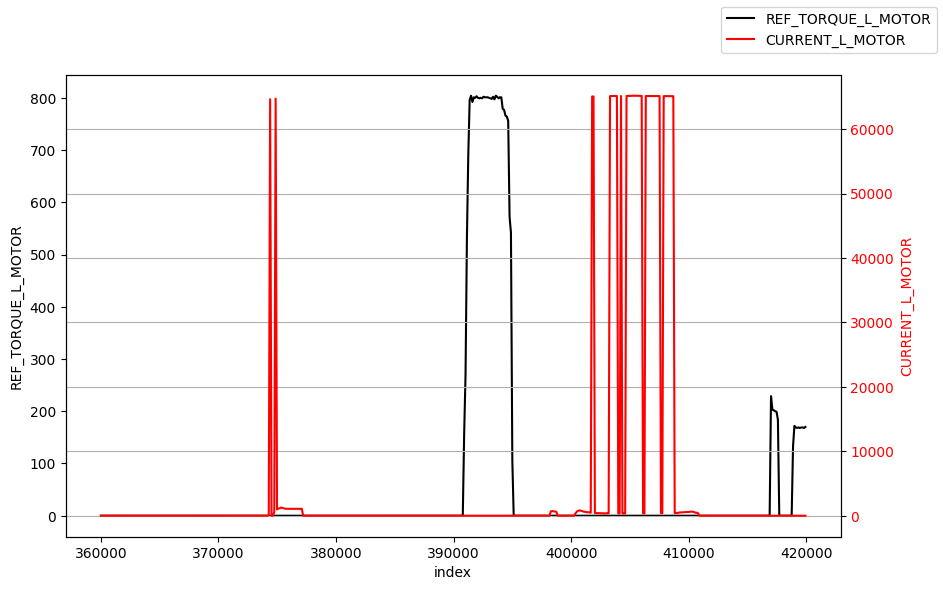

In [17]:
START_TIME = 360e3
END_TIME = 420e3

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(torque_ctrl['t'][get_range_by_time(torque_ctrl, START_TIME, END_TIME)], torque_ctrl['REF_TORQUE_L_MOTOR'][get_range_by_time(torque_ctrl, START_TIME, END_TIME)], label='REF_TORQUE_L_MOTOR', color='black')
ax1.set_xlabel('index')
ax1.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['t'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)], 
    left_motor_info_1['CURRENT_L_MOTOR'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)], 
    label='CURRENT_L_MOTOR', 
    color='red'
)
ax2.set_ylabel('CURRENT_L_MOTOR', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

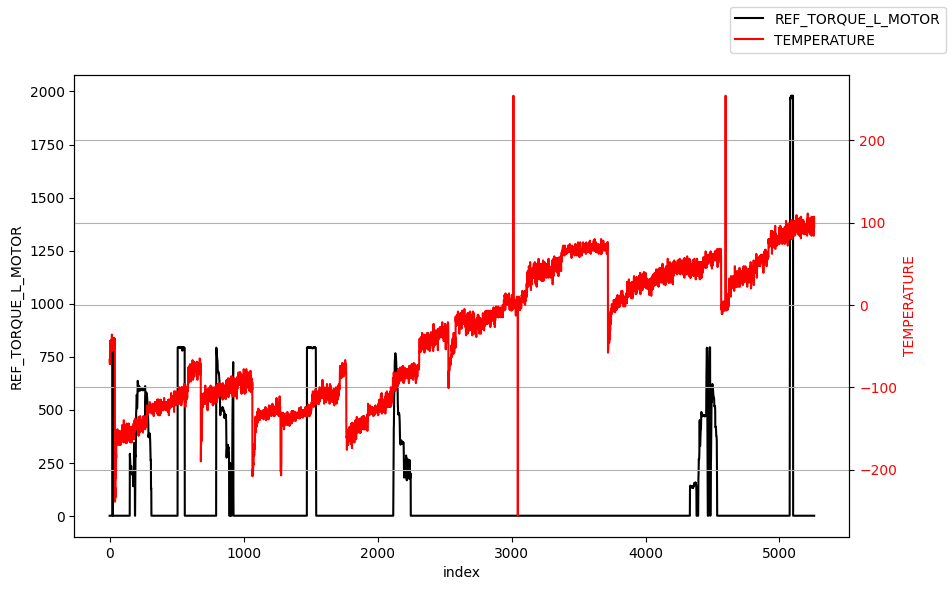

In [5]:
# plota dados raw
plot_range = range(min(len(eletrobuild_temperature['index']), len(torque_ctrl['index'])))
# plot_range = range(3700, 4200)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(torque_ctrl['index'][plot_range], torque_ctrl['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='black')
ax1.set_xlabel('index')
ax1.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    eletrobuild_temperature['index'][plot_range], 
    eletrobuild_temperature['TEMPERATURE'][plot_range], 
    label='TEMPERATURE', 
    color='red'
)
ax2.set_ylabel('TEMPERATURE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

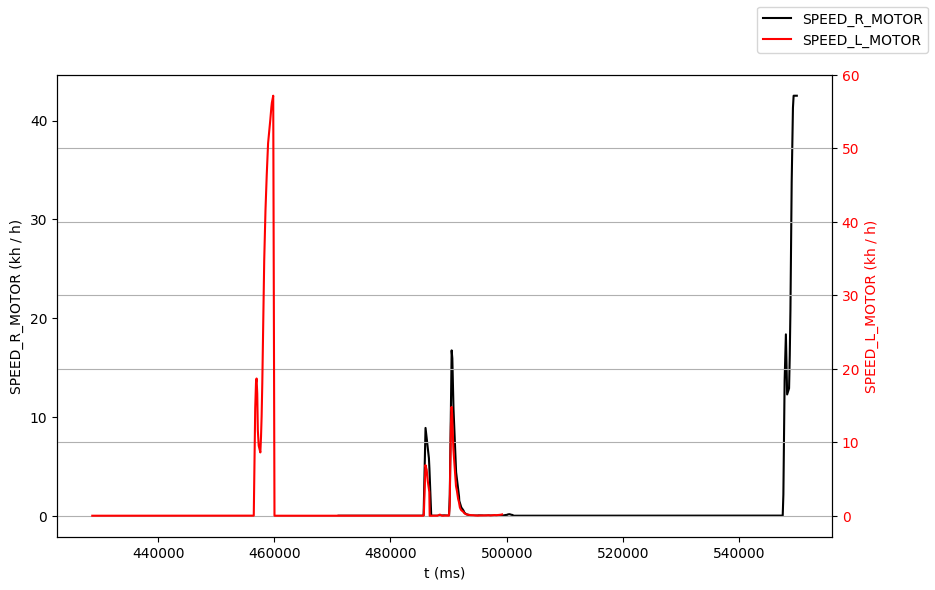

In [28]:
# analise de aceleração / desaceleração
# plota dados raw
# plot_range = range(min(len(left_motor_info_1['t']), len(right_motor_info_1['t'])))
plot_range = range(3000, 3500)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.set_xlabel('t (ms)')

ax1.plot(
    right_motor_info_1['t'][plot_range], 
    right_motor_info_1['SPEED_R_MOTOR'][plot_range] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_R_MOTOR', 
    color='black'
)
ax1.set_ylabel('SPEED_R_MOTOR (kh / h)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['t'][plot_range], 
    left_motor_info_1['SPEED_L_MOTOR'][plot_range] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_L_MOTOR', 
    color='red'
)
ax2.set_ylabel('SPEED_L_MOTOR (kh / h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

In [31]:
accumulator_params

,index,date,MIN_VOLTAGE,MAX_VOLTAGE,TOTAL_VOLTAGE,SHUNT_CURRENT,1,2,3,4,t
0,0,1762968055153,3.32,3.18,79.1,0,0,0,0,0,1582
1,1,1762968055619,3.32,3.25,79.2,0,0,0,0,0,2048
2,2,1762968056501,3.32,3.25,79.2,0,0,0,0,0,2930
3,3,1762968056967,3.32,3.18,79.1,0,0,0,0,0,3396
4,4,1762968057433,3.32,3.25,79.2,0,0,0,0,0,3862
...,...,...,...,...,...,...,...,...,...,...,...
720,720,1762968615401,3.32,3.16,79.0,0,0,0,0,0,561830
721,721,1762968616218,3.32,3.24,79.1,0,0,0,0,0,562647
722,722,1762968617450,3.32,3.24,79.1,0,0,0,0,0,563879
723,723,1762968621214,3.32,3.24,79.1,0,0,0,0,0,567643


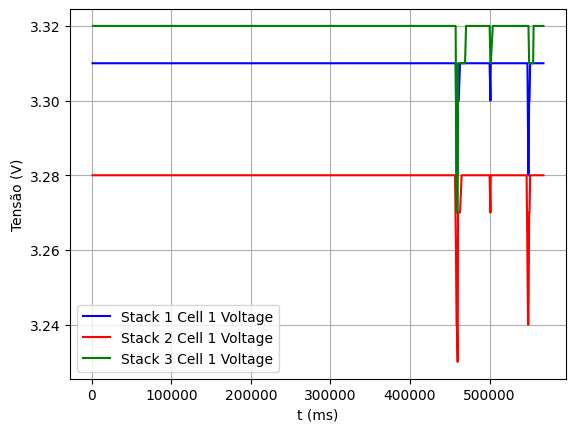

In [30]:
plot_range = range(min(len(stack1_voltage['t']), len(accumulator_params['t'])))

# plota a tensao em todas as stacks
fig, ax = plt.subplots()

# Plot the data
ax.plot(stack1_voltage['t'], stack1_voltage['CEL_1'], label='Stack 1 Cell 1 Voltage', color='blue')
ax.plot(stack2_voltage['t'], stack2_voltage['CEL_1'], label='Stack 2 Cell 1 Voltage', color='red')
ax.plot(stack3_voltage['t'], stack3_voltage['CEL_1'], label='Stack 3 Cell 1 Voltage', color='green')

# Add labels and a title
ax.set_xlabel('t (ms)')
ax.set_ylabel('Tensão (V)')

# Add a grid for better readability
ax.grid(True)
ax.legend()

# Display the plot
plt.show()

range(0, 725)


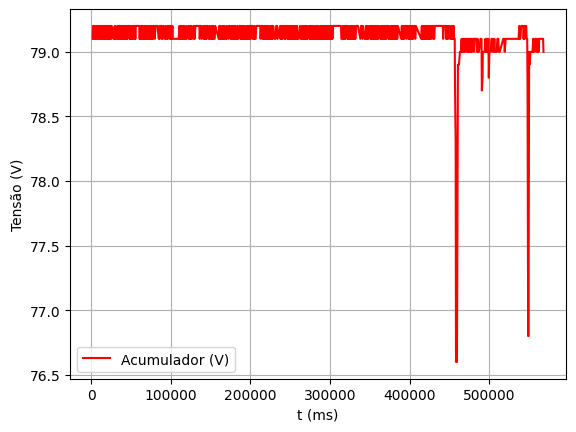

In [40]:
plot_range = range(min(len(stack1_voltage['t']), len(accumulator_params['t'])))
print(plot_range)
# plot_range = range(500, 725)

# plota a tensao em todas as stacks
fig, ax = plt.subplots()

# Plot the data
ax.plot(accumulator_params['t'][plot_range], accumulator_params['TOTAL_VOLTAGE'][plot_range], label='Acumulador (V)', color='red')

# Add labels and a title
ax.set_xlabel('t (ms)')
ax.set_ylabel('Tensão (V)')

# Add a grid for better readability
ax.grid(True)
ax.legend()

# Display the plot
plt.show()

In [48]:
accumulator_params

,index,date,MIN_VOLTAGE,MAX_VOLTAGE,TOTAL_VOLTAGE,SHUNT_CURRENT,1,2,3,4,t
0,0,1762968055153,3.32,3.18,79.1,0,0,0,0,0,1582
1,1,1762968055619,3.32,3.25,79.2,0,0,0,0,0,2048
2,2,1762968056501,3.32,3.25,79.2,0,0,0,0,0,2930
3,3,1762968056967,3.32,3.18,79.1,0,0,0,0,0,3396
4,4,1762968057433,3.32,3.25,79.2,0,0,0,0,0,3862
...,...,...,...,...,...,...,...,...,...,...,...
720,720,1762968615401,3.32,3.16,79.0,0,0,0,0,0,561830
721,721,1762968616218,3.32,3.24,79.1,0,0,0,0,0,562647
722,722,1762968617450,3.32,3.24,79.1,0,0,0,0,0,563879
723,723,1762968621214,3.32,3.24,79.1,0,0,0,0,0,567643


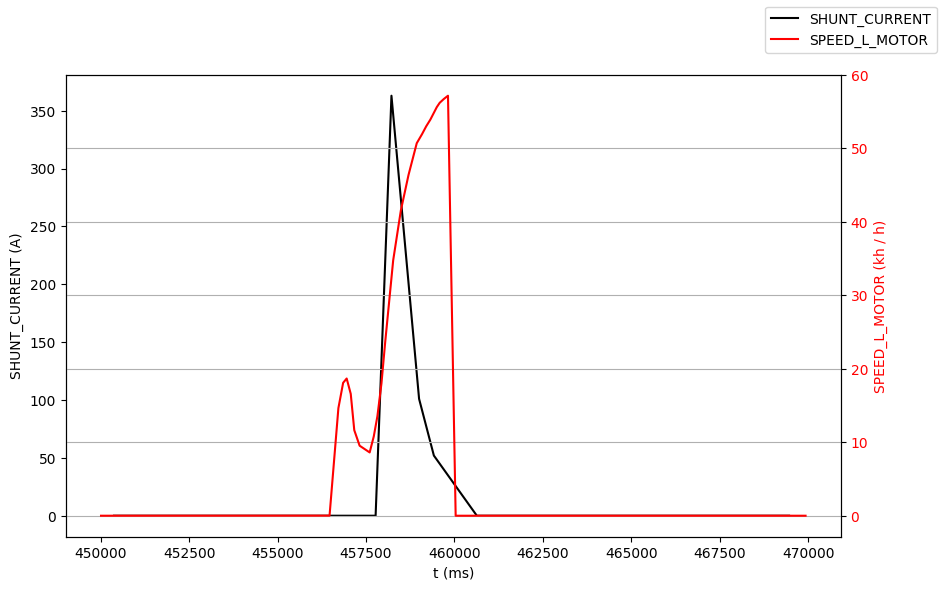

In [52]:
# plota dados raw
START_TIME = 450000
END_TIME = 470000

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(accumulator_params['t'][get_range_by_time(accumulator_params, START_TIME, END_TIME)], 
         accumulator_params['SHUNT_CURRENT'][get_range_by_time(accumulator_params, START_TIME, END_TIME)], label='SHUNT_CURRENT', color='black')
ax1.set_xlabel('t (ms)')
ax1.set_ylabel('SHUNT_CURRENT (A)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['t'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)], 
    left_motor_info_1['SPEED_L_MOTOR'][get_range_by_time(left_motor_info_1, START_TIME, END_TIME)] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_L_MOTOR', 
    color='red'
)
ax2.set_ylabel('SPEED_L_MOTOR (kh / h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()